Text(0, 0.5, 'Relative error')

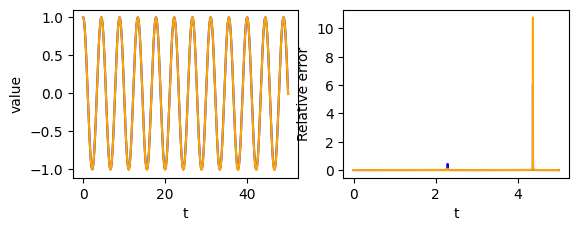

In [5]:
import math
import matplotlib.pyplot as plt
e=00000000000.1
a=0
b=0
repeat=5000
def Euler(f,x1,x2,t0,tend):             #とりあえず単純なにばねに関する二階微分方程式、x1は微分前の初期値、x2は微分後の初期値
    v1=x2
    x01=x1
    delta=(tend-t0)/repeat
    for i in range(repeat):
        x01=x01+v1*delta
        v1=v1+f(x01)*delta
    return x01
def t_scale(t0,tend):
    deltat=(tend-t0)/repeat
    return  [ i*deltat for i in range(repeat)]
def f1(x):
    return -2*x
listf11=list(map(lambda t: Euler(f1,1,0,0,t),t_scale(0,50)))
plt.subplot(2,2,1)
plt.plot(t_scale(0,50),listf11,color='blue',label='オイラー法')
def Ecent(f,x1,x2,t0,tend):             #とりあえず単純なばねに関する二階微分方程式、x1は微分前の初期値、x2は微分後の初期値
    v1=x2
    x01=x1
    deltat=(tend-t0)/repeat
    for i in range(repeat):
        x01=x01+v1*deltat
        v1=v1+f(x01+deltat/2)*deltat
    return x01
listf12=list(map(lambda t: Ecent(f1,1,0,0,t),t_scale(0,50)))
plt.plot(t_scale(0,50),listf12,color='orange',label='中点法')
plt.xlabel('t')
plt.ylabel('value')
def analy(x):
    return math.sin(math.sqrt(2)*x)
def erroreu(x1,x2,t0,t):
    return abs((analy(t)-Euler(f1,x1,x2,t0,t))/(analy(t)+e))
def errorce(x1,x2,t0,t):
    return abs((analy(t)-Ecent(f1,x1,x2,t0,t))/(analy(t)+e))
plt.subplot(2,2,2)
listf13=list(map(lambda t: erroreu(1,0,math.pi/(math.sqrt(2)*2),t),t_scale(0,5)))
plt.plot((t_scale(0,5)),listf13,color='blue',label='オイラー法')
listf14=list(map(lambda t: errorce(1,0,math.pi/(math.sqrt(2)*2),t),t_scale(0,5)))
plt.plot(t_scale(0,5),listf14,color='orange',label='中点法')
plt.xlabel('t')
plt.ylabel('Relative error')